In [322]:
import sqlite3
import matplotlib.pyplot as plt

In [323]:
conn = sqlite3.connect('vivino_v2.db')

In [324]:
cursor = conn.cursor()

In [325]:
cursor.execute("SELECT NAME, ROUND((ratings_average / (price_euros/bottle_volume_ml)), 3) AS Rate_div_price_per_ml, ratings_average, ratings_count, price_euros FROM vintages WHERE ratings_count > 1000 ORDER BY (ratings_average / (price_euros/bottle_volume_ml)) DESC LIMIT 10")


In [326]:
results = cursor.fetchall()

In [327]:
column1_values = [row[0] for row in results]
column2_values = [row[1] for row in results]


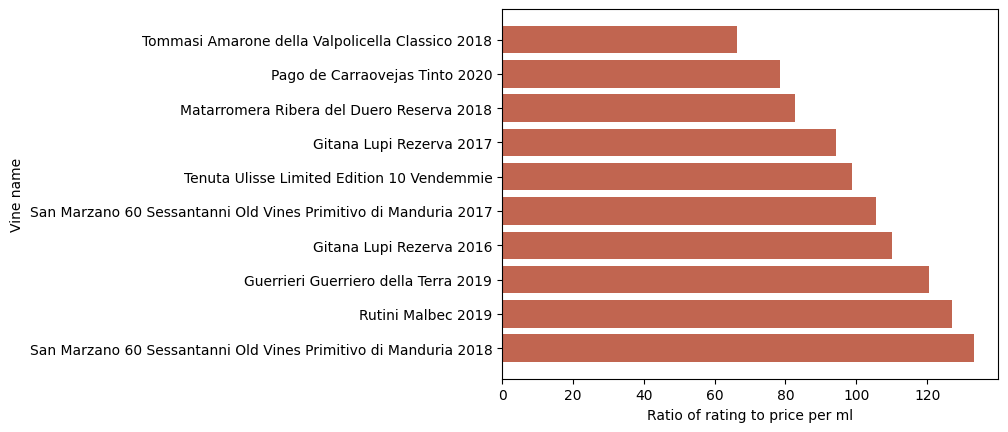

In [328]:
plt.barh (column1_values, column2_values, color = "#C16550")
plt.xlabel('Ratio of rating to price per ml')
plt.ylabel('Vine name')
#plt.title('Top 10 vine')
plt.show()

In [329]:
We have a marketing budget for this year, which country should we prioritise and why?

Object `why` not found.


In [330]:
cursor.execute("SELECT name, users_count FROM countries ORDER BY users_count DESC LIMIT 3")


In [331]:
results = cursor.fetchall()

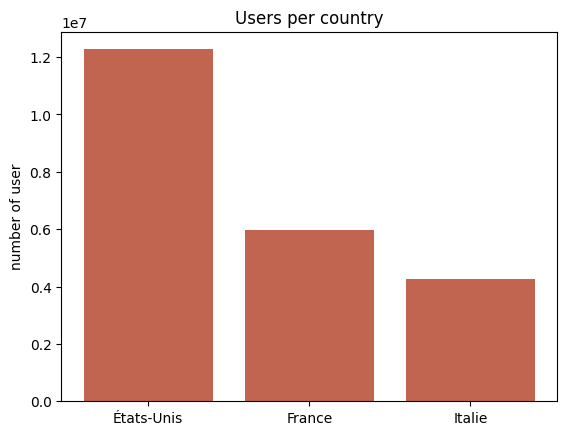

In [332]:
column1_values = [row[0] for row in results]
column2_values = [row[1] for row in results]
plt.bar (column1_values, column2_values, color = "#C16550")
#plt.xlabel('countrys')
plt.ylabel('number of user')
plt.title('Users per country')
plt.show()


We would like to give a price to the best winery, which one should we choose and why?

In [333]:
cursor.execute("SELECT wineries.name, wines.ratings_count FROM wines INNER JOIN wineries ON  wines.winery_id = wineries.id ORDER BY ratings_count DESC LIMIT 3")


In [334]:
results = cursor.fetchall()

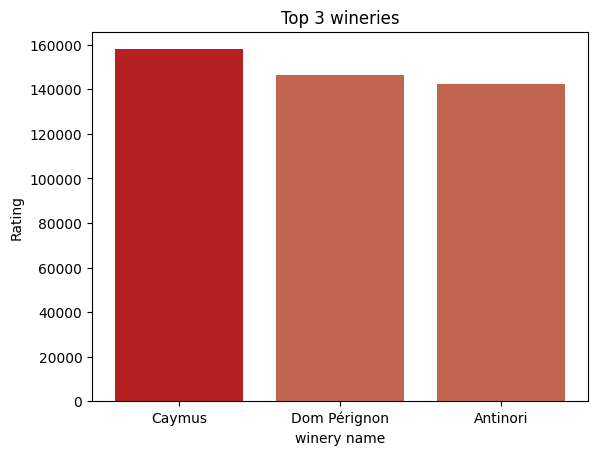

In [335]:
column1_values = [row[0] for row in results]
column2_values = [row[1] for row in results]
max_value = max(column2_values)

plt.bar(column1_values, column2_values, color = "#C16550" )
plt.bar(column1_values[column2_values.index(max_value)], max_value, color='#B52020')

plt.xlabel('winery name')
plt.ylabel('Rating')
plt.title('Top 3 wineries')

plt.show()


wines that have those keywords*
- Coffee
	- Toast
	- Green apple
	- cream
	- citrus

average wine rating for each `country`


average vintages rating for each `country`

In [336]:
cursor.execute("SELECT countries.name, ROUND(AVG(wines.ratings_average), 2) AS average_rating FROM wines JOIN regions ON wines.region_id = regions.id JOIN countries ON regions.country_code = countries.code GROUP BY countries.name ORDER BY ROUND(AVG(wines.ratings_average), 2) ASC;")


In [337]:
results = cursor.fetchall()

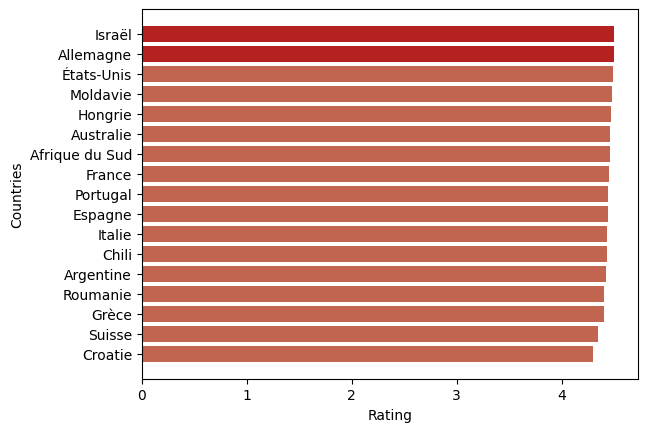

In [338]:
column1_values = [row[0] for row in results]
column2_values = [row[1] for row in results]
max_value = max(column2_values)

plt.barh(column1_values, column2_values, color = "#C16550" )
for i, value in enumerate(column2_values):
    if value == max_value:
        plt.barh(column1_values[i], value, color='#B52020')

plt.xlabel('Rating')
plt.ylabel('Countries')
#plt.title('Average wine rating for country')

plt.show()


average vintages rating for each `country`

In [339]:
cursor.execute("SELECT countries.name, ROUND(AVG(vintages.ratings_average), 2) AS average_rating FROM wines JOIN vintages ON vintages.wine_id = wines.id JOIN regions ON wines.region_id = regions.id JOIN countries ON regions.country_code = countries.code GROUP BY countries.name ORDER BY average_rating ASC;")


In [340]:
results = cursor.fetchall()

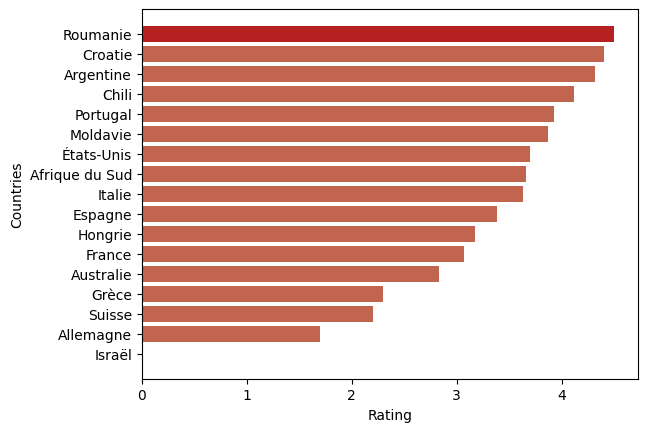

In [341]:
column1_values = [row[0] for row in results]
column2_values = [row[1] for row in results]
max_value = max(column2_values)

plt.barh(column1_values, column2_values, color = "#C16550")
for i, value in enumerate(column2_values):
    if value == max_value:
        plt.barh(column1_values[i], value, color='#B52020')

plt.xlabel('Rating')
plt.ylabel('Countries')
#plt.title('Average vintages rating for country')

plt.show()
